In [1]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split , cross_val_score , cross_val_predict
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score

In [2]:

a = load_breast_cancer()
# Convert the NumPy array to a Pandas DataFrame
df = pd.DataFrame(a.data, columns=a.feature_names)
df['target'] = a.target
pd.set_option('display.max_columns', None)


df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


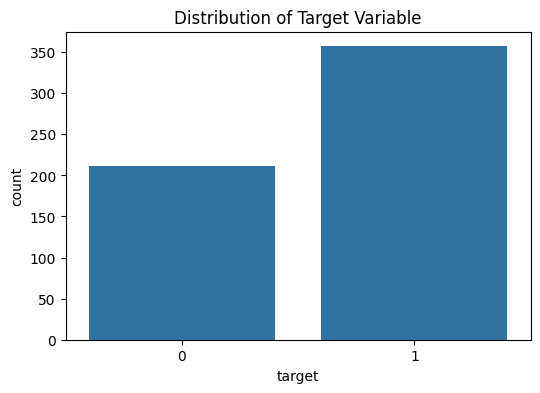

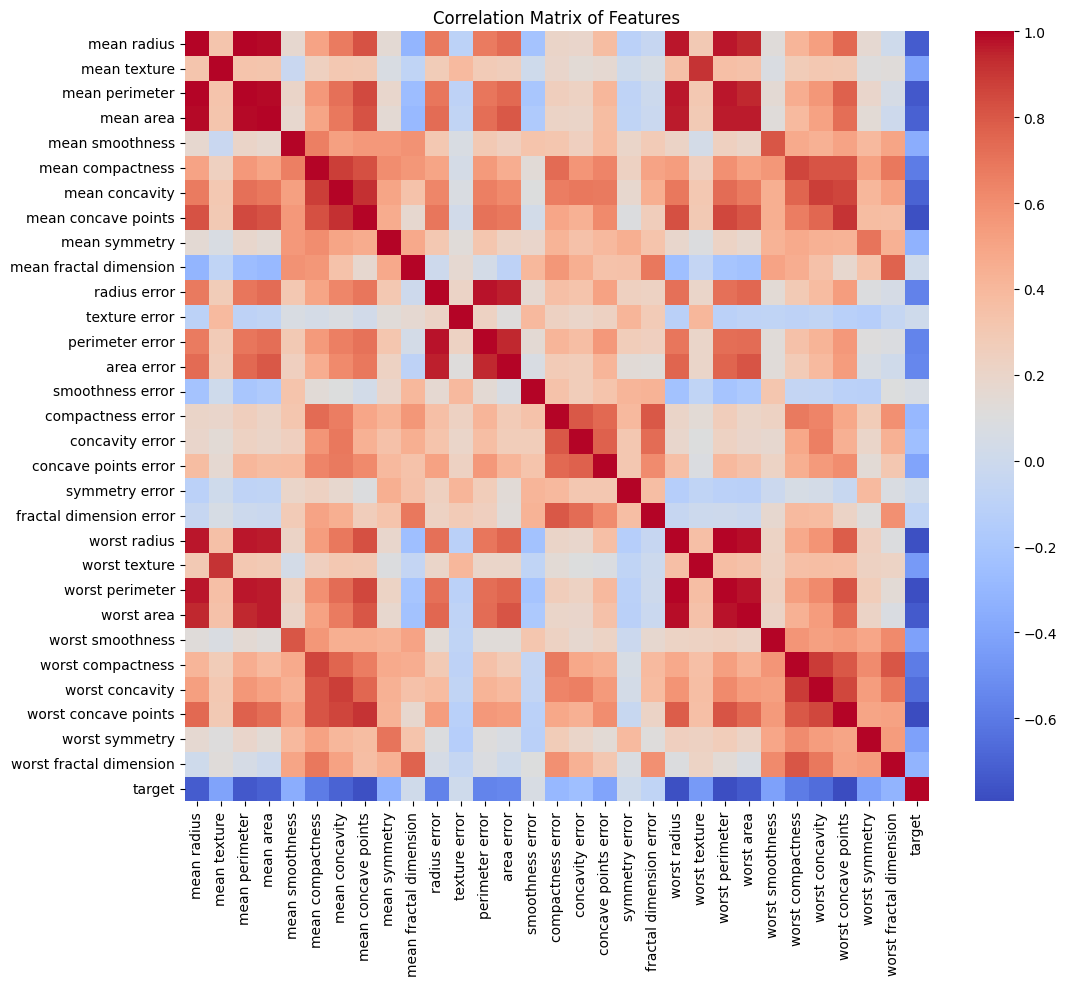

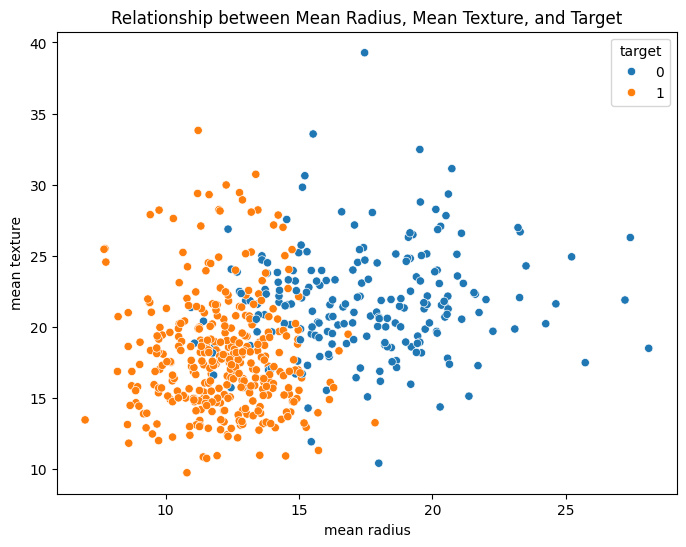

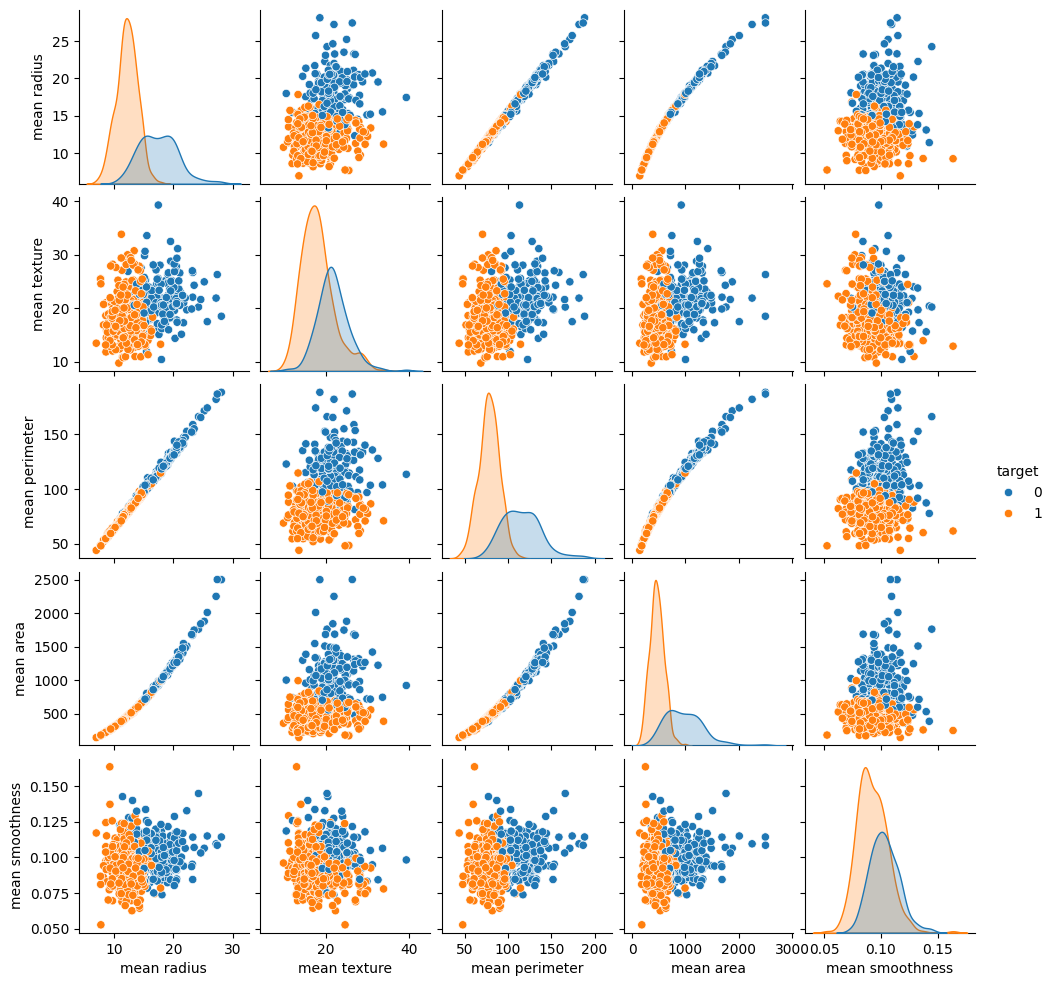

In [3]:


# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Visualize the correlation matrix of features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Visualize the relationship between two features and the target variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=df)
plt.title('Relationship between Mean Radius, Mean Texture, and Target')
plt.show()

# Pairplot for multiple features
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'], height=2)
plt.show()

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the GradientBoostingClassifier model
gb_model = GradientBoostingClassifier(learning_rate=0.5, max_depth=6, max_features=0.2,
                                     min_samples_leaf=16, min_samples_split=5,
                                     n_estimators=100, subsample=0.45)

# Generate cross-validated predictions
y_pred = cross_val_predict(gb_model, X, y, cv=5)

# Calculate metrics
f1 = f1_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

# Print the metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.9819193324061196
Precision: 0.9751381215469613
Recall: 0.988795518207283
